## https://www.kaggle.com/competitions/titanic/data
## https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook

Understand and explain in your own words the following :


Explain what is this competition about.
Explain the data.
Go through the notebook thoroughly - understand different stages of -
Data Gathering/ Aquisition
Data Analysis (with raw data)
Cleaning Data / Handling missing values 
Feature Engineering
Model Building 
Results
Evaluation


## Explain what is this competition about


The Titanic Machine Learning competition in Kaggle is to use Machine Learning algorithms to create a model that predicts which passengers survived in the Titanic Shipwreck.This analysis can be done by building a predictive model that determines who all survived among the people who boarded the ship.


## Explain the data.

There will be two datasets provided , train dataset and test dataset.Both dataset will have the passenger information like sex, age, name , gender socio economic class etc.

Train.csv will have the details of the subset of the passengers onboard and will have the information of who survived and who didnot.The information of whether the passenger survived or not is called the grond truth pf a challenge.

Test.csv will have the similar dataset except the groundtruth, the compettitor has to predict who all have survived.This dataset is used to see how well the model performs for unseen data.The trained data is used for each passenger in the test data to determine whether the passenger survived or not.






## Data Gathering/ Aquisition

Data gathering is a stage where Python Pandas helps in working with the datasets.We start by acquiring both train and test datasets convert both to a dataframe. Inorder to perform cetain operations as a whole both train and test data set should be combined together and it can be performed with the below steps


# Data Analysis (with raw data)

Analyzing the data can be done by the following steps ,

## Feature Analysis

Features available in the dataset,Knowing the features which are categorical and numerical will allow to classify the samples in to sets of similar samples.

Categorical features can be nominal, ordinal, ratio and interval based.

For Numerical features can be discreet, continous or timeseries based.

Features with mixed data types Numerical, alphanumeric data within same features(Ticket is a numeric and alphanumeric, cabin is alphanumeric)

Name features error or typos like Title names, brackets and quotes for alternate or short names.

Determining the distribution of numerical values across the samples.

Determining the distribution of categorical features


#### Validating the assumptions based on the analysis done 

**Correlating of features 

with the Survival and the quick correlations are matched with the modelled correlations.

**Completing of features 

Age and Embarked feature has to be complete. Age is more correlated to survival where as embarked may also relate to the survival rate.

**Correcting the features .

The features that has high ratio of duplicates can be dropped and which has less correlation to survival , Example : Ticket No.
Drop the values which is highly incomplete and has many null values in both train and test dataset Eg:Cabin feature
Drop the values which donot contribute to the target value , Example: PassengerId
Name features are relatively non-standard and can be dropped as it is not directly contributing.
 
**Creating new features

Create new features by combining one or two features which can contribute to analyse the target value.Eg:Parch and Sibsp as it is family based which will get total of all family members.

Engineer features to extract new features. Eg:Name feature is engineered to extract the Title.

Convert features to create bands , by converting continous numerical feature to ordinal categorical feature.Eg: Age bands

Create range features which can help in analysis.Eg: Fare range

**Classifying features

Adding assumptions which feature can be more influenced towards the target value

Eg: Women, child and P-class 

 

### Cleaning Data / Handling missing values

##### Types of Missing Values

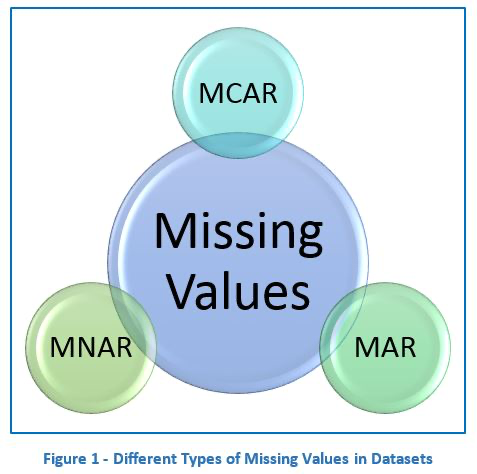

###### MCAR(Missing Completely at Random)
There is no  relationship with the missing value or any other data. There is no pattern and it can be of the human error, system failure or loss of sample.

###### MAR(Missing at Random)
You have complete information on why the data is missed as there is some relationship between missing data and other data.There will be a pattern for the missing of values.Probbaility of missing data depends on the observed data.In this case, the statistical analysis might result in bias.

###### MNAR(Missing Not At random)
There is some pattern in the missing data and the observed value cannot explain why it was missed.if the missing data donot fall in MCAR or AR it is MNAR

###### If missing values are not handled properly , building a biased ML model will lead to incorrect results and also lead in lack of precision in statistical analysis.

### Handling Missing Values

1. Check for Missing values in the dataset, which will provide missing values for each column in the dataset
train_df.isnull().sum()
2. Get the total missing values in the dataset
train_df.isnull().sum().sum()

### Figuring how to handle the missing values

1. Deleting Rows and Columns

The first approach is not recommended, if the value is MNAR then it should not be deleted.If the value is MAR or MCAR you can check with the SME's and delete the values if its not affecting any other values or have less importance towards th egoal.

Deleting a row can be done if the every column for the row is missing then we can drop the particular row

df = train_df.dropna(axis=0)
df.isnull().sum()

Deleting a column can be done if there is more missing values in a column

df = train_df.drop(['Dependents'],axis=1)
df.isnull().sum()

2. Imputing Missing Values

a) Replacing with Arbitary value

Replace the missing value with a '0'

b) Replacing With Mean

Common method for replacing the missing values for numerical data
Example:

train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Credit_History'] = train_df[‘Credit_History'].fillna(train_df['Credit_History'].mean())

c)Replacing With Mode

Replacing with most frequently occurring value.Mostly used for categorical features.

Example:
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])

d)Replacing With Median

Median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.

Example:
train_df['Loan_Amount_Term']= train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())

e)Replacing with previous value – Forward fill

 It is mostly used in time series data.
 
 Example:
 test.fillna(method=‘ffill')
 
f)Replacing with next value – Backward fill

the missing value is imputed using the next value.

Example:
test.fillna(method=‘bfill')

g)Interpolate

Replace the missing values with different interpolation methods like ‘polynomial’, ‘linear’, ‘quadratic’. Default method is ‘linear’.

test.interpolate()

#### Imputing Missing Values For Categorical Features

a)Impute the Most Frequent Value

‘SimpleImputer’ is used in the categorical data 

Example:
import pandas as pd
import numpy as np
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle', np.nan]})
X
Shape
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X)

b)Impute the Value “missing”, which treats it as a Separate Category

Example:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit_transform(X)

c)Imputation of Missing Value Using sci-kit learn Library
i)Univariate Approach
In a Univariate approach, only a single feature is taken into consideration. Use the class SimpleImputer and replace the missing values with mean, mode, median or some constant value.


Example:

import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

ii)Multivariate Approach

Using KNNImputer or IterativeImputer classes.

Example:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
cols = ['SibSp', 'Fare', 'Age']
X = df[cols]
X

from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(X)

d)Adding missing indicator to encode “missingness” as a feature

 There may be a relationship between the reason for missing values (also called the “missingness”) and the target variable you are trying to predict.
 
 
 
 from sklearn.impute
import SimpleImputer
#impute the mean
imputer = SimpleImputer()
imputer.fit_transform(X)

### Analyze by pivoting features

Pivoting the features can be done only to those features will have
### no empty values.


It makes sense by doing this analysis on categorical , ordinal or discrete data.Eg: Sex, Pclass or SibSp,Parch

### Analyze by visualizing data

**Visualization will help you to understand the correlations between numerical features and the target /solution goal


**For Continous data , histogram charts where banding or ranges which help to identify useful patterns


**With the visualization using histogram charts it will help to Observe which features inclined more for the goal and help to take decisions 

### Correlating numerical and ordinal features

**Combining multiple features for identifying correlations using a single plot, this can be done by numerical and categorical features with numerical values


**With this corelation, we can come into a conclusion which feature can be taken for model training.
Eg:P-class

### Correlating categorical features

**Correlate categorical features with our goal and based on the onservations , decision on features that can be taken for model training can be done.

**This will help to ideltify which categorical value can be taken for model training.Eg: Sex

**Some features won't ahve direct relation to the goal , which can help us to take the complete features for model training.



### Correlating categorical and numerical features

**Correlate categorical and continous data with the goal.

**Based on the observations decision can be made 

### Model, predict and solve


There are two types of Machine Learning.

1. Supervised Learning 

2. Unsupervised Learning

In Supervised Learning,we have to provide labeled data, Example: Stock market prices
In Unsupervised Learning, we donot need labeled data Example: classification of emails into spam and non-spam.

For Supervised Learning the different algorithms are:

1. Logistic Regression

###Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

####LR is used to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

#####Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).


2. KNN or k-Nearest Neighbors

###In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. 

###A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).

###If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

###### KNN confidence score is better than Logistics Regression but worse than SVM.

3. Support Vector Machines

#####Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

####Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

4. Naive Bayes classifier

####naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. 

#####highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.


5. Decision Tree


###Decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). 

####Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. 

###Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

6. Random Forest

###Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 


7. Perceptron


###perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not).

####It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. 



8. Artificial neural network
9. RVM or Relevance Vector Machine


#### Model evaluation

Evaluation of all the models to choose the best one for our problem.



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
#### Model Submission
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

#### UNSUPERVISED MACHINE LEARNING

@@@@Unsupervised machine learning finds all kind of unknown patterns in data.
@@@@Unsupervised methods help you to find features which can be useful for categorization.
@@@@It is taken place in real time, so all the input data to be analyzed and labeled in the presence of learners.
@@@@It is easier to get unlabeled data from a computer than labeled data, which needs manual intervention.

##### Unsupervised learning problems further grouped into clustering and association problems.

Clustering is an important concept when it comes to unsupervised learning. It mainly deals with finding a structure or pattern in a collection of uncategorized data. 

Unsupervised Learning Clustering algorithms will process your data and find natural clusters(groups) if they exist in the data.

 You can also modify how many clusters your algorithms should identify. It allows you to adjust the granularity of these groups.
 
 #### Clustering Types
Following are the clustering types of Machine Learning:

1. Hierarchical clustering
2. K-means clustering
3. K-NN (k nearest neighbors)
4. Principal Component Analysis
5. Singular Value Decomposition
6. Independent Component Analysis

### DIFFERENCE BETWEEN SUPERVISED AND UNSUPERVISED

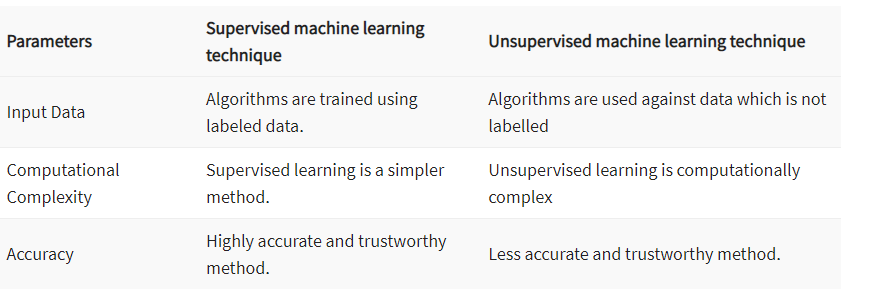